# Predict the survival probability of passengers on the Titanic.

## step0：Import relevant packages and modules

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

## step1: Data understanding and exploration

In [4]:
# Read data
train_src = pd.read_csv('data/titanic_data/train.csv')
train_src.info()
train_src.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

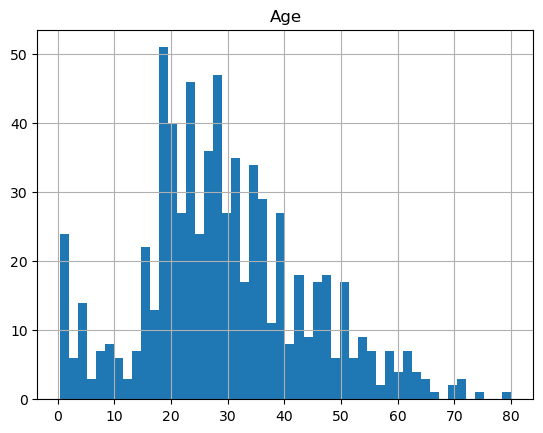

In [5]:
# Data exploration

# Age distribution
train_src.hist(column = 'Age', bins = 50)

<Axes: xlabel='Sex'>

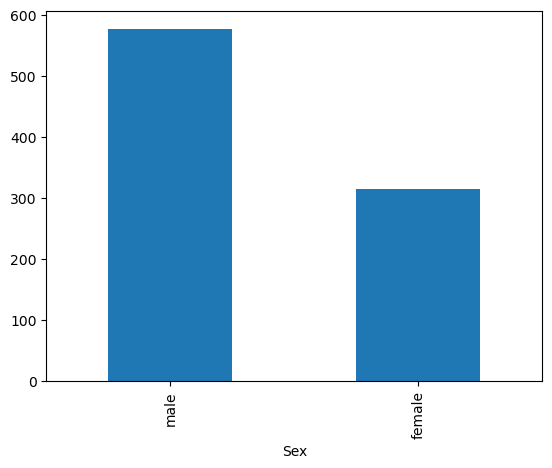

In [6]:
# Sex distribution
train_src['Sex'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Sex'>

<Axes: xlabel='Pclass'>

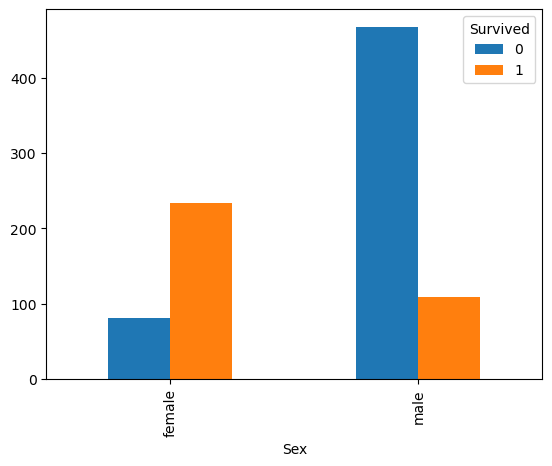

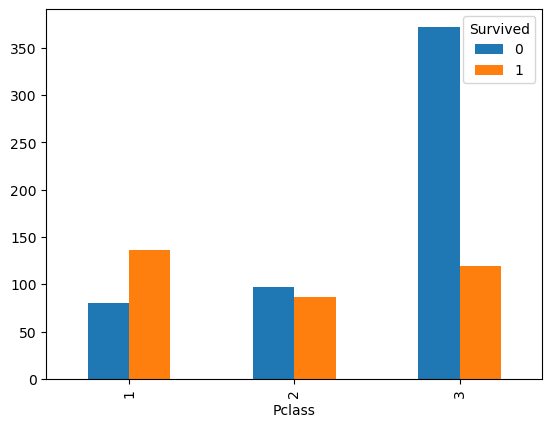

In [ ]:
# The correlation between gender and the target (whether to survive)
pd.crosstab(train_src['Sex'], train_src['Survived']).plot(kind = 'bar')

#Pclass and Target
pd.crosstab(train_src['Pclass'], train_src['Survived']).plot(kind = 'bar')

#Age and Target (First, convert it to a categorical variable.)
train_src.age = pd.cut(train_src.Age, [0,5,15,20,35,50,60,100])

<Axes: xlabel='Age'>

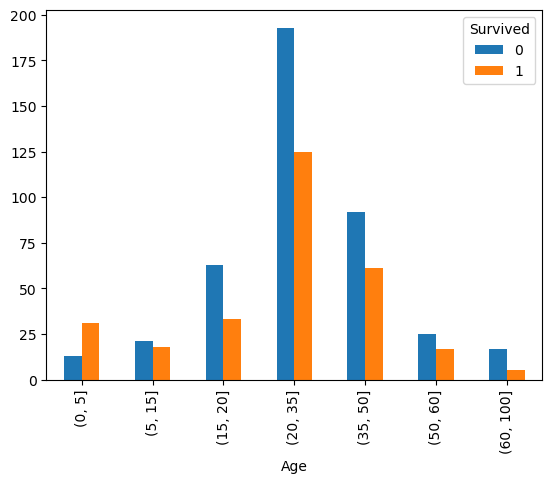

In [8]:
pd.crosstab(train_src.age, train_src.Survived).plot(kind = 'bar')

## step2: Data preparation

In [15]:
# Select the following six variables as predictive variables (features)
train = train_src[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

# Use 0 and 1 to represent the two categories of the Sex variable
train['Sex'] = train['Sex'].replace({'male' : 1, 'female': 0})

In [16]:
# There are 117 passengers with confirmed ages, which are replaced by the average age.
age_mean = train['Age'].mean()
train['Age'] = train['Age'].fillna(age_mean)

In [17]:
train.head()
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


## step3: Build a model

In [18]:
# Split the independent variable X and the target variable y
train_X = train.iloc[:, 1:]
train_y = train['Survived']

# Train a model using the logistic regression algorithm
lr = LogisticRegression() # Use default parameters
lr.fit(train_X, train_y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
# Check the lr coefficient of the model
print(lr.coef_)
print(train_X.columns)
pd.DataFrame(list(zip(np.transpose(lr.coef_), train_X.columns)), columns = ['coef', 'columns'])

[[-1.04839293 -2.6520502  -0.03880683 -0.33865928 -0.10105584  0.00301736]]
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


,coef,columns
0,[-1.0483929262324623],Pclass
1,[-2.6520501961074525],Sex
2,[-0.038806828234814746],Age
3,[-0.3386592837633473],SibSp
4,[-0.10105583836807369],Parch
5,[0.003017359629322928],Fare


## step4: Model Evaluation
It is still evaluated by the model itself, so its credibility is not high.

In [22]:
train_y_pred = lr.predict(train_X) # Predict on the training set and output the labels
train_y_pred_prob = lr.predict_proba(train_X) # Output probability
print(train_y_pred)
print(train_y_pred_prob)

# misclassification matrix
cnf_matrix = metrics.confusion_matrix(train_y, train_y_pred)
print(cnf_matrix)

# Accuracy
precision = metrics.accuracy_score(train_y, train_y_pred)
print(precision)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1
 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 

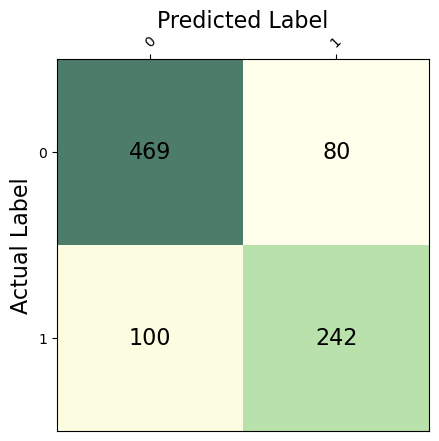

In [ ]:
# A more intuitive display of the misclassification matrix
def show_confusion_matrix(cnf_matrix, class_labels):
    plt.matshow(cnf_matrix, cmap=plt.cm.YlGn, alpha = 0.7)
    ax = plt.gca() # Get Current Axes
    ax.set_xlabel('Predicted Label', fontsize =  16)
    ax.set_xticks(range(0, len(class_labels)))
    ax.set_xticklabels(class_labels, rotation = 45)
    ax.set_ylabel('Actual Label', fontsize = 16, rotation = 90)
    ax.set_yticks(range(0, len(class_labels)))
    ax.set_yticklabels(class_labels)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    for row in range(len(cnf_matrix)): # 在Each grid cell displays a number
        for col in range(len(cnf_matrix[row])):
            ax.text(col, row, cnf_matrix[row][col], va = 'center', ha = 'center', fontsize = 16)
    
class_labels = [0,1]
show_confusion_matrix(cnf_matrix, class_labels)

## step5：对新数据进行预测

In [28]:
# Preparation of test data is consistent with that of the training set
test_src = pd.read_csv('data/titanic_data/test.csv')
test = test_src[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
test['Sex'].replace({'male': 1, 'female': 0}, inplace = True)
test['Age'].fillna(age_mean, inplace = True)

# There are null values in the test set for Fare ticket prices, 
# which are replaced with the average value from the training set.
test['Fare'].fillna(round(train['Fare'].mean()), inplace = True)

In [29]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875


In [31]:
# Predictions on test data
test_X = test.iloc[:, 1:]
test_y_pred = lr.predict(test_X) # Make predictions on the test set
test_pred = pd.DataFrame({'PassengerId' : test['PassengerId'],
                          'Survived' : test_y_pred.astype(int)})
test_pred.to_csv('data/titanic_data/test_pred.csv', index = False)

In [32]:
# Check the prediction results
test_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
